# Plane wave decomposition Example 1


## Purpose

This notebook shows how to simulate in python how scalar electromagnetic waves propagates from a nearfield source to the farfield

This method can be used to compute diffraction patterns through any screen apertures with a known transparency function (see example 2)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Some general parameters

In [2]:
u = 1         # length unit, e.g. 1 µm
wlen = 1* u      # wavelength in unit of u
N=401         # odd number of points in the screen 
size = 40*wlen   # size of the screen where the nearfield signal will be defined
distance = 2*wlen  # observation plane in the farfield

### Creating a nearfield pattern composed of two unit impulse signals located in x=-Dx/2, y=0 and x=Dx/2,y=0

(-5.0, 5.0)

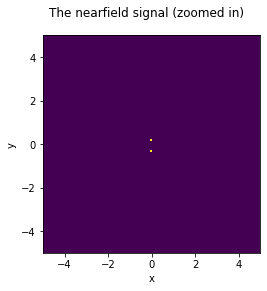

In [3]:
Dx=wlen/2
Dpix=int(N*Dx/size)
x = np.linspace(-size/2,size/2,N)*u
y = x
sig = np.zeros((N,N))
sig[int((N-1)/2-Dpix/2),int((N-1)/2)] = 1
sig[int((N-1)/2+Dpix/2),int((N-1)/2)] = 1

# plot the nearfield signal
fig1, ax1 = plt.subplots()
pcm1=ax1.pcolor(x,y,sig)
ax1.axis('square')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
fig1.suptitle('The nearfield signal (zoomed in)')
ax1.set_xlim([-5*wlen,5*wlen])
ax1.set_ylim([-5*wlen,5*wlen])

### Array of spatial frequencies centered on 0, in rad per unit length u:

In [4]:
kx=np.zeros(N,dtype=complex)
freq_array1=np.linspace(-(N-1)/2,(N-1)/2,N)    # normalized spatial freq. in the signal
array2=freq_array1/(np.max(x)-np.min(x));      # spatial freq. in 1/x unit
kx = 2*np.pi*array2;                           # angular spatial freq in rad/x_unit  (wavenumber in ur case)
ky = kx  # because the screen is a square array of N by N elements
KX,KY = np.meshgrid(kx,ky)  # definition of grid arrays for vectorization computation

### FFT computation of the angular spectrum, several options (idem in matlab)

In [5]:
# 1) Simplest expression: the spectrum have 0th freq at first point
#   can't be used here later on, cause we have centered our freq in middle 
#TF=np.fft.fft2(sig) # 
#SIG =np.fft.ifft(TF)

# 2) More common expression: the spectrum have 0th freq in middle
#TF=np.fft.fftshift(np.fft.fft2(sig)) 
#SIG =np.fft.ifft2(np.fft.ifftshift(TF))

#3) like 2) but phase Origin @center, (not @left as both 2 above)
TF=np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(sig)))
SIG=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(TF)))


### Plot signal and angular spectrum in nearfield plane.
since the nearfield signal is an unit impulse, the angular spectrum is uniform (amplitude=1) 

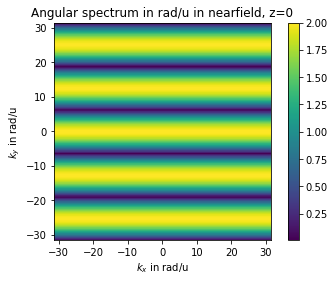

In [6]:

fig2, ax2 = plt.subplots()

pcm2 = ax2.pcolor(kx,ky,np.abs(TF))
ax2.axis('square')
ax2.set_xlabel(r'$k_x$ in rad/u')
ax2.set_ylabel(r'$k_y$ in rad/u')
ax2.set_title('Angular spectrum in rad/u in nearfield, z='+str(0))
plt.colorbar(pcm2,ax=ax2)

### Propagation in far field
the plane waves have to be propagated towards the far field with the use of the inverse fft

In [7]:
k=2*np.pi/wlen;   # wavenumber in vacuum
KZ=np.sqrt(k**2-KX**2-KY**2+0j) # Array of kz
H=np.exp(1j*KZ*distance)        # propagation function, since kz is an array, H is also an arra
TFz=TF*H;
SIGz=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(TFz))); # <=use if choice (3)

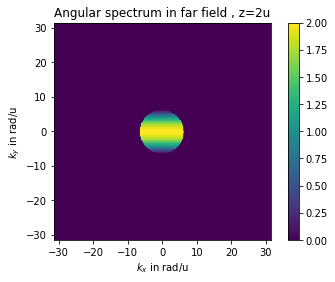

In [8]:
fig3, ax3 = plt.subplots()

pcm3 = ax3.pcolor(kx,ky,np.abs(TFz))
ax3.axis('square')
ax3.set_xlabel(r'$k_x$ in rad/u')
ax3.set_ylabel(r'$k_y$ in rad/u')
ax3.set_title('Angular spectrum in far field , z='+ str(distance)+'u')
plt.colorbar(pcm3,ax=ax3)


## The farfield pattern

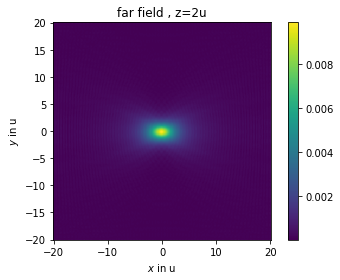

In [9]:
fig4, ax4 = plt.subplots()

pcm4 = ax4.pcolor(x,y,np.abs(SIGz))
ax4.axis('square')
ax4.set_xlabel(r'$x$ in u')
ax4.set_ylabel(r'$y$ in u')
ax4.set_title('far field , z='+ str(distance)+'u')
plt.colorbar(pcm4,ax=ax4)

## Image obtained with a perfect lens NA=1, and magnification =1
Propagation filters out high frequencies from the signal because they correspond to evanescent waves that exponentially decay as z is increasing. A way to compute the image of the nearfield signal obtained with a perfect lens of numerical aperture NA=1  is to apply a hat filter to remove the spatial frequencies carried by the evanescent waves. The remaining frequencies lie in a disk of radius $$k_0 = \sqrt {k_x^2+k_y^2}={2 \pi \over \lambda}$$.

(-5.0, 5.0)

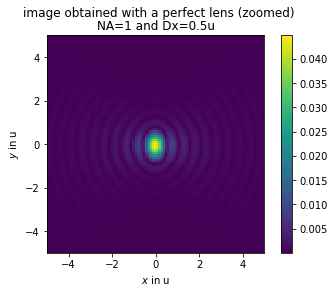

In [18]:
hat=np.zeros((N,N))
hat[np.where(np.imag(KZ)==0)]=1

SIGfocused=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(TF*hat )));
fig5, ax5 = plt.subplots()

pcm5 = ax5.pcolor(x,y,(np.abs(SIGfocused)))
ax5.axis('square')
ax5.set_xlabel(r'$x$ in u')
ax5.set_ylabel(r'$y$ in u')
fig5.suptitle('image obtained with a perfect lens (zoomed)')
ax5.set_title('NA=1 and Dx='+str(Dx)+'u')
plt.colorbar(pcm5,ax=ax5)
ax5.set_xlim([-5*wlen,5*wlen])
ax5.set_ylim([-5*wlen,5*wlen])

now we examine the effect of NA lower than 1. The remaining frequencies lie in a disk of radius $$k_0 {NA}={2 \pi {NA}\over \lambda }$$.

(-5.0, 5.0)

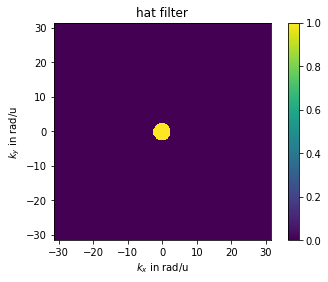

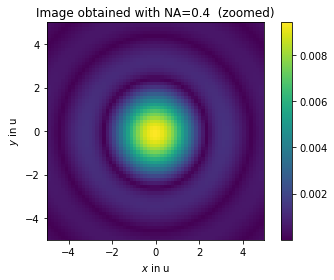

In [16]:
NA=0.4
hat=np.zeros((N,N))
hat[np.where(np.real(KX**2+KY**2)<=(2*np.pi/wlen*NA)**2)]=1

SIGfocused=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(TF*hat )));
fig6, ax6 = plt.subplots()
pcm6 = ax6.pcolor(kx,ky,(np.abs(hat)))
ax6.axis('square')
ax6.set_xlabel(r'$k_x$ in rad/u')
ax6.set_ylabel(r'$k_y$ in rad/u')
ax6.set_title('hat filter')
plt.colorbar(pcm6,ax=ax6)
fig7, ax7 = plt.subplots()
pcm7 = ax7.pcolor(kx,ky,(np.abs(SIGfocused)))
ax7.axis('square')
ax7.set_xlabel(r'$x$ in u')
ax7.set_ylabel(r'$y$ in u')
fig7.suptitle('image obtained with a perfect lens (zoomed)')
ax5.set_title('NA=1 and Dx='+str(Dx)+'u')
plt.colorbar(pcm7,ax=ax7)
ax7.set_xlim([-5*wlen,5*wlen])
ax7.set_ylim([-5*wlen,5*wlen])